In [216]:
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import quandl

import warnings
warnings.filterwarnings('ignore')

seed = 17


In [217]:
np.random.seed(seed)

In [128]:
def create_lagged_dataset(dataset, lag=1):
    df = pd.DataFrame(dataset)
    for i in range(lag):
        new_feature = df.T.tail(1).T.shift(-1)
        df = pd.concat((df, new_feature), axis=1)
    dataX = df.values[:len(dataset) - lag,:-1]
    dataY = df.values[:len(dataset) - lag,-1]
    return dataX, dataY

In [91]:
# source: https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [258]:
# ts_df = quandl.get("FRBP/ROUTPUT_MOSTRECENT", authtoken="MHASo5sqBFCvT5s55CxJ")
ts_df = quandl.get("FRED/DFF", authtoken="MHASo5sqBFCvT5s55CxJ")

In [259]:
ts_df.tail()

,Value
Date,
2019-05-13,2.38
2019-05-14,2.38
2019-05-15,2.40
2019-05-16,2.39
2019-05-17,2.39


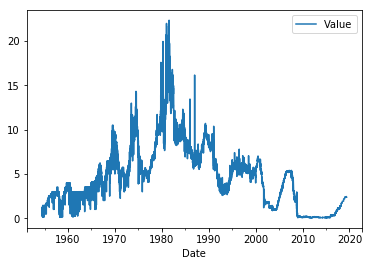

In [260]:
ts_df.plot();

In [349]:
# TOO SLOW !!!


# # for RandomForest
# def validate_gamma(lags, n_splits, ts, gamma_test_part = 6, gammas=[0.3, 0.9, 1]):
#     ts_gamma_train = ts.values[: (gamma_test_part - 1) * int(ts.shape[0] // gamma_test_part)]
#     ts_gamma_test = ts.values[(gamma_test_part - 1) * int(ts.shape[0] // gamma_test_part):]
    
#     res_mape = {}
#     tscv = TimeSeriesSplit(n_splits=n_splits)
#     gammas_best = []
#     i = -1
#     for gamma in gammas:
#         i += 1
#         lowest_mape = 10**10
#         gammas_best.append(-1)
#         for lag in lags:
#             mapes = []
#             for train_index, test_index in tscv.split(ts_gamma_train):
#                 ts_train, ts_test = ts_gamma_train[train_index], ts_gamma_train[test_index]

#                 # train test
#                 X_train, y_train = create_lagged_dataset(ts_train, lag=lag)
#                 X_test, y_test = create_lagged_dataset(ts_test, lag=lag)
#                 model = RandomForestRegressor(random_state=seed)
#                 model.fit(X_train,y_train)
#                 y_hat = model.predict(X_test)

#                 mapes.append(mean_absolute_percentage_error(y_test, y_hat))

            
#             powers = np.arange(len(mapes))[::-1]
#             gammas = np.ones(len(mapes)) * gamma
#             print(np.mean(np.power(gammas, powers) * mapes))
#             res_mape[str(gamma) + "_" + str(lag)] = np.mean(np.power(gammas, powers) * mapes)
#             if np.mean(np.power(gammas, powers) * mapes) < lowest_mape:
#                 gammas_best[i] = lag
#                 lowest_mape = np.mean(np.power(gammas, powers) * mapes)
            
#     mapes_for_gammas = []
#     best_gamma = None
#     if len(np.unique(gammas_best)) == 1:
#         best_gamma = "same_results"
#     else:
#         for gamma_best in gammas_best:
            
#             X_train, y_train = create_lagged_dataset(ts_gamma_train, lag=gamma_best)
#             X_test, y_test = create_lagged_dataset(ts_gamma_test, lag=gamma_best)
#             model = RandomForestRegressor()
#             model.fit(X_train, y_train)
            
#             y_hat = model.predict(X_test)
#             mapes_for_gammas.append(mean_absolute_percentage_error(y_test, y_hat))
        
#         best_gamma = gammas[np.argmin(mapes_for_gammas)]
            
#     return res_mape , gammas_best , best_gamma
            
    
            

In [ ]:
# for RandomForest

def validate_gamma(lags, n_splits, ts, gamma_test_part = 6, gammas=[0.3, 0.9, 1]):
    ts_gamma_train = ts.values[: (gamma_test_part - 1) * int(ts.shape[0] // gamma_test_part)]
    ts_gamma_test = ts.values[(gamma_test_part - 1) * int(ts.shape[0] // gamma_test_part):]
    
    res_mape = {}
    tscv = TimeSeriesSplit(n_splits=n_splits)
    gammas_best = []
    i = -1

    for lag in lags:
        mapes = []
        for train_index, test_index in tscv.split(ts_gamma_train):
            ts_train, ts_test = ts_gamma_train[train_index], ts_gamma_train[test_index]

            # train test
            X_train, y_train = create_lagged_dataset(ts_train, lag=lag)
            X_test, y_test = create_lagged_dataset(ts_test, lag=lag)
            model = RandomForestRegressor(random_state=seed)
            model.fit(X_train,y_train)
            y_hat = model.predict(X_test)

            mapes.append(mean_absolute_percentage_error(y_test, y_hat))


        for gamma in gammas:
            powers = np.arange(len(mapes))[::-1]
            gammas_pow = np.ones(len(mapes)) * gamma
            res_mape[str(gamma) + "_" + str(lag)] = np.mean(np.power(gammas_pow, powers) * mapes)
            
    print(res_mape)
    i = -1
    for gamma in gammas:
        i += 1
        lowest_mape = 10**10
        for lag in lags:
            if res_mape[str(gamma)]
            
            
    mapes_for_gammas = []
    best_gamma = None
    if len(np.unique(gammas_best)) == 1:
        best_gamma = "same_results"
    else:
        for gamma_best in gammas_best:
            X_train, y_train = create_lagged_dataset(ts_gamma_train, lag=gamma_best)
            X_test, y_test = create_lagged_dataset(ts_gamma_test, lag=gamma_best)
            model = RandomForestRegressor()
            model.fit(X_train, y_train)
            
            y_hat = model.predict(X_test)
            mapes_for_gammas.append(mean_absolute_percentage_error(y_test, y_hat))
        
        best_gamma = gammas[np.argmin(mapes_for_gammas)]
            
    return res_mape , gammas_best , best_gamma
            
    
            

In [371]:
validate_gamma([1,2,3], 5, ts_df)

{'0.3_1': 1.4809058980054663, '0.9_1': 6.443127063947051, '1_1': 8.565141244562165, '0.3_2': 1.139640146146227, '0.9_2': 6.218368142710573, '1_2': 8.4102975074545, '0.3_3': 1.3991476026078775, '0.9_3': 6.583993725023026, '1_3': 8.83576779475328}


ValueError: attempt to get argmin of an empty sequence

In [271]:
# M4 competition
df = pd.read_csv("Yearly-train.csv")

In [272]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V827,V828,V829,V830,V831,V832,V833,V834,V835,V836
0,Y1,5172.1,5133.5,5186.9,5084.6,5182.0,5414.3,5576.2,5752.9,5955.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Y2,2070.0,2104.0,2394.0,1651.0,1492.0,1348.0,1198.0,1192.0,1105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Y3,2760.0,2980.0,3200.0,3450.0,3670.0,3850.0,4000.0,4160.0,4290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Y4,3380.0,3670.0,3960.0,4190.0,4440.0,4700.0,4890.0,5060.0,5200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Y5,1980.0,2030.0,2220.0,2530.0,2610.0,2720.0,2970.0,2980.0,3100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


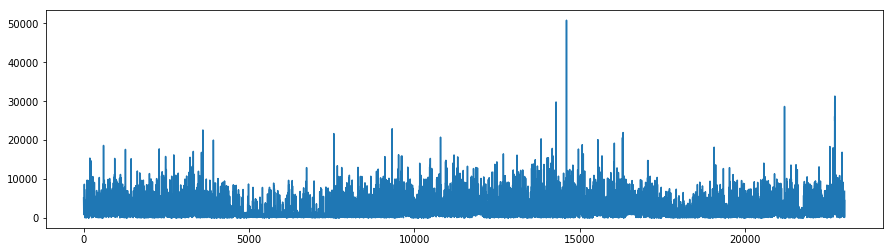

In [289]:
plt.figure(figsize=(15,4))
plt.plot(df["V2"]);

In [361]:
validate_gamma([1, 10, 50, 150], 3, df["V2"])

116.03985273744452 10000000000
236.47572697277505 10000000000
264.2978213572042 10000000000
112.22404358922059 10000000000
213.50601681346302 10000000000
235.73412226285234 10000000000


KeyboardInterrupt: 